In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy as sp
from statistics import mode
from catboost import CatBoostClassifier

build_data=pd.read_csv(r'C:\Users\cruise\desktop\ins data\train_data.csv')
test_data=pd.read_csv(r'C:\Users\cruise\desktop\ins data\test_data.csv')

In [2]:
build_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [3]:
build_data.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [4]:
test_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [5]:
build_data.groupby("Claim").Claim.count()

Claim
0    5526
1    1634
Name: Claim, dtype: int64

In [6]:
build_data.shape

(7160, 14)

In [7]:
test_data.shape

(3069, 13)

In [8]:
build_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
Customer Id           7160 non-null object
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building_Painted      7160 non-null object
Building_Fenced       7160 non-null object
Garden                7153 non-null object
Settlement            7160 non-null object
Building Dimension    7054 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     6652 non-null float64
NumberOfWindows       7160 non-null object
Geo_Code              7058 non-null object
Claim                 7160 non-null int64
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [9]:
build_data["Geo_Code"].value_counts()

6088     143
33063    137
6083     113
13206     98
31555     87
        ... 
91691      1
13102      1
63430      1
66025      1
64237      1
Name: Geo_Code, Length: 1307, dtype: int64

In [10]:
test_data["Geo_Code"].value_counts()

6083     113
6088      95
2B033     74
13206     68
13204     61
        ... 
78124      1
5061       1
60139      1
68226      1
92071      1
Name: Geo_Code, Length: 697, dtype: int64

In [11]:
build_data.groupby("Garden").Claim.count()

Garden
O    3602
V    3551
Name: Claim, dtype: int64

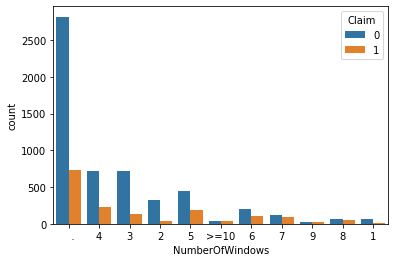

In [12]:
sns.countplot(x="NumberOfWindows",hue="Claim",data=build_data)

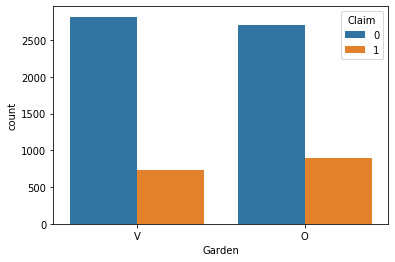

In [13]:
sns.countplot(x="Garden",hue="Claim",data=build_data)

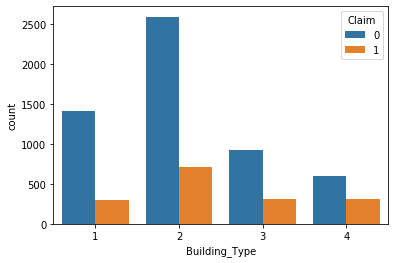

In [14]:
sns.countplot(x="Building_Type",hue="Claim",data=build_data)

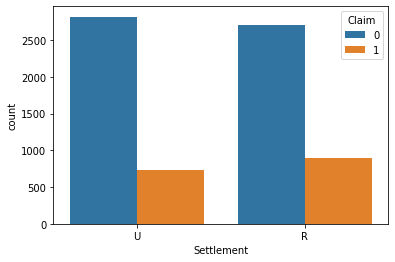

In [15]:
sns.countplot(x="Settlement",hue="Claim",data=build_data)

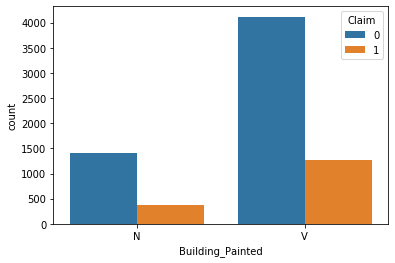

In [16]:
sns.countplot(x="Building_Painted",hue="Claim",data=build_data)

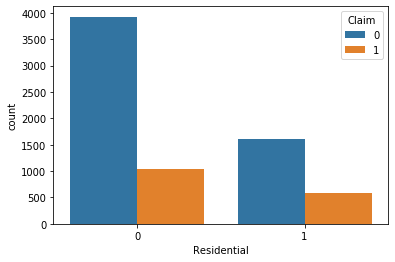

In [17]:
sns.countplot(x="Residential",hue="Claim",data=build_data)

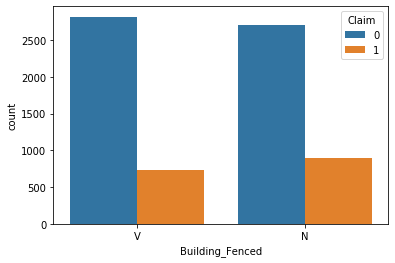

In [18]:
sns.countplot(x="Building_Fenced",hue="Claim",data=build_data)

In [19]:
pd.crosstab(build_data['Building_Type'],build_data['Claim'])

Claim,0,1
Building_Type,,
1,1412,304
2,2593,712
3,919,311
4,602,307


In [20]:
pd.crosstab(build_data['Building_Type'],build_data['Claim'],normalize=True)

Claim,0,1
Building_Type,,
1,0.197207,0.042458
2,0.362151,0.099441
3,0.128352,0.043436
4,0.084078,0.042877


In [21]:
pd.crosstab(build_data['NumberOfWindows'],build_data['Claim'])

Claim,0,1
NumberOfWindows,,
.,2819,732
1,68,7
2,323,40
3,713,131
4,717,222
5,447,192
6,201,105
7,121,90
8,61,55


In [22]:
build_data.dtypes[build_data.dtypes == 'float64']

Insured_Period        float64
Building Dimension    float64
Date_of_Occupancy     float64
dtype: object

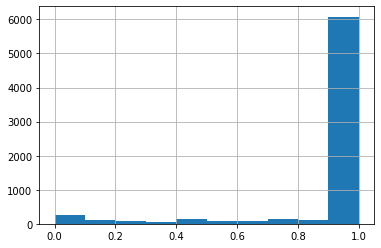

In [23]:
build_data["Insured_Period"].hist()

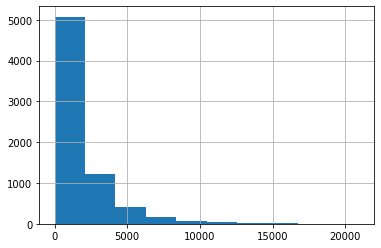

In [24]:
build_data["Building Dimension"].hist()

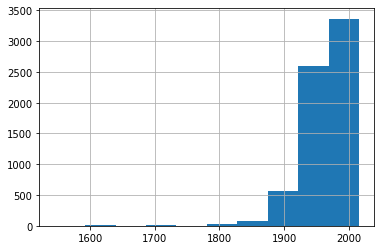

In [25]:
build_data["Date_of_Occupancy"].hist()

In [26]:
build_data['Insured_Period'].value_counts()

1.000000    5325
0.997268     547
0.000000     165
0.747945      60
0.495890      49
            ... 
0.680328       1
0.819672       1
0.792350       1
0.378082       1
0.803279       1
Name: Insured_Period, Length: 401, dtype: int64

In [27]:
pd.crosstab(build_data['Insured_Period'],build_data['Claim'])

Claim,0,1
Insured_Period,,
0.000000,139,26
0.002732,1,0
0.010929,1,0
0.016393,2,0
0.021918,3,0
...,...,...
0.994521,1,0
0.994536,20,4
0.997260,19,7


In [28]:
pd.crosstab(build_data['Residential'],build_data['Claim'])

Claim,0,1
Residential,,
0,3926,1047
1,1600,587


In [29]:
build_data['Building_Fenced'] = build_data['Building_Fenced'].replace({'N':1, 'V':0})
build_data['Building_Painted'] = build_data['Building_Painted'].replace({'N':1, 'V':0})
build_data['Garden'] = build_data['Garden'].replace({'V':1, 'O':0})
build_data['Settlement'] = build_data['Settlement'].replace({'U':1, 'R':0})

test_data['Building_Fenced'] = test_data['Building_Fenced'].replace({'N':1, 'V':0})
test_data['Building_Painted'] = test_data['Building_Painted'].replace({'N':1, 'V':0})
test_data['Garden'] = test_data['Garden'].replace({'V':1, 'O':0})
test_data['Settlement'] = test_data['Settlement'].replace({'U':1, 'R':0})

In [30]:
build_data.describe()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7153.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,0.248324,0.503911,0.496435,0.495810,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,0.432071,0.500020,0.500022,0.500017,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,0.000000,0.000000,0.000000,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [31]:
build_data.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [32]:
build_data['Building Dimension'].mean()

1883.7275304791608

In [33]:
test_data['Building Dimension'].mean()

1666.7905759162304

In [34]:

build_data['Building Dimension'] = build_data['Building Dimension'].fillna(value=1300.0)
test_data['Building Dimension'] = test_data['Building Dimension'].fillna(value=1000.0)

In [35]:
build_data['Geo_Code'] = build_data['Geo_Code'].fillna(value=-1)
test_data['Geo_Code'] = test_data['Geo_Code'].fillna(value=-1)

In [36]:
build_data['Date_of_Occupancy'] = build_data['Date_of_Occupancy'].fillna(value=-1)
test_data['Date_of_Occupancy'] = test_data['Date_of_Occupancy'].fillna(value=-1)

In [37]:
build_data['Garden'] = build_data['Garden'].fillna(value=-1)
test_data['Garden'] = test_data['Garden'].fillna(value=-1)

In [38]:
build_data["NumberOfWindows"]=build_data["NumberOfWindows"].replace('   .',"0")
build_data["NumberOfWindows"]=build_data["NumberOfWindows"].replace('>=10',"11")

In [39]:
build_data.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [40]:
build_data['Geo_Code'] = build_data['Geo_Code'].map(build_data['Geo_Code'].value_counts().to_dict())
test_data['Geo_Code'] = test_data['Geo_Code'].map(test_data['Geo_Code'].value_counts().to_dict())

In [41]:
build_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
Customer Id           7160 non-null object
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building_Painted      7160 non-null int64
Building_Fenced       7160 non-null int64
Garden                7160 non-null float64
Settlement            7160 non-null int64
Building Dimension    7160 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     7160 non-null float64
NumberOfWindows       7160 non-null object
Geo_Code              7160 non-null int64
Claim                 7160 non-null int64
dtypes: float64(4), int64(8), object(2)
memory usage: 783.2+ KB


In [1831]:
build_data.to_csv('ins1_train.csv', index=False)
test_data.to_csv('ins1_test.csv', index=False)

In [1832]:
build_data.corr()['Claim']

YearOfObservation    -0.016367
Insured_Period        0.088715
Residential           0.063509
Building_Painted     -0.029857
Building_Fenced       0.051657
Garden               -0.052236
Settlement           -0.052019
Building Dimension    0.295518
Building_Type         0.112168
Date_of_Occupancy     0.019288
Geo_Code              0.034749
Claim                 1.000000
Name: Claim, dtype: float64

In [1833]:
build_data.corr()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Geo_Code,Claim
YearOfObservation,1.000000,0.025434,-0.040391,-0.056881,0.120373,-0.119031,-0.120103,0.010450,0.005490,0.041636,-0.017736,-0.016367
Insured_Period,0.025434,1.000000,-0.037620,0.037077,0.047091,-0.047744,-0.046504,0.008433,-0.017811,0.182661,-0.038107,0.088715
Residential,-0.040391,-0.037620,1.000000,0.032927,0.082448,-0.081257,-0.082684,0.056544,0.334039,-0.081502,0.025907,0.063509
Building_Painted,-0.056881,0.037077,0.032927,1.000000,-0.574757,0.573813,0.575081,-0.090031,0.048541,-0.028621,0.000003,-0.029857
Building_Fenced,0.120373,0.047091,0.082448,-0.574757,1.000000,-0.997784,-0.999441,0.135139,0.020430,0.266582,-0.058412,0.051657
Garden,-0.119031,-0.047744,-0.081257,0.573813,-0.997784,1.000000,0.997783,-0.135885,-0.018432,-0.266205,0.059440,-0.052236
Settlement,-0.120103,-0.046504,-0.082684,0.575081,-0.999441,0.997783,1.000000,-0.135022,-0.020320,-0.265657,0.058671,-0.052019
Building Dimension,0.010450,0.008433,0.056544,-0.090031,0.135139,-0.135885,-0.135022,1.000000,0.008836,0.091111,-0.045159,0.295518
Building_Type,0.005490,-0.017811,0.334039,0.048541,0.020430,-0.018432,-0.020320,0.008836,1.000000,-0.086072,0.336342,0.112168
Date_of_Occupancy,0.041636,0.182661,-0.081502,-0.028621,0.266582,-0.266205,-0.265657,0.091111,-0.086072,1.000000,-0.012748,0.019288


In [1834]:
pd.crosstab(build_data['Settlement'],build_data['Garden'])

Garden,-1.0,0.0,1.0
Settlement,,,
0,7,3602,1
1,0,0,3550


In [1835]:
pd.crosstab(build_data['Settlement'],build_data['Building_Fenced'])

Building_Fenced,0,1
Settlement,,
0,2,3608
1,3550,0


In [1836]:

build_data['paint_fence'] = build_data['Building_Painted'] + build_data['Building_Fenced']
build_data['paint_garden'] = build_data['Building_Painted'] + build_data['Garden']
build_data['paint_resident'] = build_data['Building_Painted'] + build_data['Residential']

In [1837]:
build_data['garden_resident'] = build_data['Garden'] + build_data['Residential']
build_data['set_resident'] = build_data['Settlement'] + build_data['Residential']
build_data['set_paintresident'] = build_data['Settlement'] + build_data['paint_resident']


test_data['garden_resident'] = test_data['Garden'] + test_data['Residential']
test_data['set_resident'] = test_data['Settlement'] + test_data['Residential']


In [1838]:
test_data['paint_fence'] = test_data['Building_Painted'] + test_data['Building_Fenced']
test_data['paint_garden'] = test_data['Building_Painted'] + test_data['Garden']
test_data['paint_resident'] = test_data['Building_Painted'] + test_data['Residential']
test_data['set_paintresident'] = test_data['Settlement'] + test_data['paint_resident']

In [1839]:
build_data.corr()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Geo_Code,Claim,paint_fence,paint_garden,paint_resident,garden_resident,set_resident,set_paintresident
YearOfObservation,1.000000,0.025434,-0.040391,-0.056881,0.120373,-0.119031,-0.120103,0.010450,0.005490,0.041636,-0.017736,-0.016367,0.082055,-0.101697,-0.067277,-0.119969,-0.120784,-0.110529
Insured_Period,0.025434,1.000000,-0.037620,0.037077,0.047091,-0.047744,-0.046504,0.008433,-0.017811,0.182661,-0.038107,0.088715,0.091166,-0.009582,-0.002039,-0.063226,-0.062315,-0.026297
Residential,-0.040391,-0.037620,1.000000,0.032927,0.082448,-0.081257,-0.082684,0.056544,0.334039,-0.081502,0.025907,0.063509,0.127770,-0.032033,0.739824,0.642822,0.643830,0.464138
Building_Painted,-0.056881,0.037077,0.032927,1.000000,-0.574757,0.573813,0.575081,-0.090031,0.048541,-0.028621,0.000003,-0.029857,0.333364,0.868445,0.696796,0.464231,0.464836,0.786699
Building_Fenced,0.120373,0.047091,0.082448,-0.574757,1.000000,-0.997784,-0.999441,0.135139,0.020430,0.266582,-0.058412,0.051657,0.579911,-0.903517,-0.327737,-0.708706,-0.709052,-0.760262
Garden,-0.119031,-0.047744,-0.081257,0.573813,-0.997784,1.000000,0.997783,-0.135885,-0.018432,-0.266205,0.059440,-0.052236,-0.578298,0.904367,0.327956,0.711249,0.708621,0.759525
Settlement,-0.120103,-0.046504,-0.082684,0.575081,-0.999441,0.997783,1.000000,-0.135022,-0.020320,-0.265657,0.058671,-0.052019,-0.578946,0.903685,0.327785,0.708538,0.709314,0.760594
Building Dimension,0.010450,0.008433,0.056544,-0.090031,0.135139,-0.135885,-0.135022,1.000000,0.008836,0.091111,-0.045159,0.295518,0.066065,-0.129173,-0.020026,-0.064556,-0.063675,-0.086045
Building_Type,0.005490,-0.017811,0.334039,0.048541,0.020430,-0.018432,-0.020320,0.008836,1.000000,-0.086072,0.336342,0.112168,0.071862,0.014136,0.272402,0.221423,0.220669,0.176315
Date_of_Occupancy,0.041636,0.182661,-0.081502,-0.028621,0.266582,-0.266205,-0.265657,0.091111,-0.086072,1.000000,-0.012748,0.019288,0.278638,-0.176065,-0.077757,-0.262075,-0.261619,-0.195652


In [1840]:

build_data.to_csv('ins2_train.csv', index=False)
test_data.to_csv('ins2_test.csv', index=False)

In [1841]:
##ft3

In [1842]:

build_data['Insured_Period_r'] = build_data['Insured_Period'].round(2)
test_data['Insured_Period_r'] = test_data['Insured_Period'].round(2)

In [1843]:
test_data['Insured_Period_r'].value_counts()

1.00    2604
0.75      34
0.00      33
0.25      24
0.33      24
        ... 
0.63       1
0.14       1
0.56       1
0.90       1
0.39       1
Name: Insured_Period_r, Length: 92, dtype: int64

In [1844]:

def month(x):
    if 0<x <= 1/12:
        return 1
    elif 1/12<x<= 2/12:
        return 2
    elif 2/12<x<= 3/12:
        return 3
    elif 3/12<x<= 4/12:
        return 4
    elif 4/12 <x<= 5/12:
        return 5
    elif 5/12<x<= 6/12:
        return 6
    elif 6/12<x<= 7/12:
        return 7
    elif 7/12 <x <= 8/12:
        return 8
    elif 8/12< x <= 9/12:
        return 9
    elif 9/12<x <= 10/12:
        return 10
    elif 10/12<x<= 11/12:
        return 11
    else:
        return 12

In [1845]:
month(0.5)

6

In [1846]:
build_data['month'] = build_data['Insured_Period_r'].apply(month)
test_data['month'] = test_data['Insured_Period_r'].apply(month)

In [1847]:
build_data.corr()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Geo_Code,Claim,paint_fence,paint_garden,paint_resident,garden_resident,set_resident,set_paintresident,Insured_Period_r,month
YearOfObservation,1.000000,0.025434,-0.040391,-0.056881,0.120373,-0.119031,-0.120103,0.010450,0.005490,0.041636,-0.017736,-0.016367,0.082055,-0.101697,-0.067277,-0.119969,-0.120784,-0.110529,0.026747,0.019424
Insured_Period,0.025434,1.000000,-0.037620,0.037077,0.047091,-0.047744,-0.046504,0.008433,-0.017811,0.182661,-0.038107,0.088715,0.091166,-0.009582,-0.002039,-0.063226,-0.062315,-0.026297,0.999983,0.778219
Residential,-0.040391,-0.037620,1.000000,0.032927,0.082448,-0.081257,-0.082684,0.056544,0.334039,-0.081502,0.025907,0.063509,0.127770,-0.032033,0.739824,0.642822,0.643830,0.464138,-0.037700,-0.046380
Building_Painted,-0.056881,0.037077,0.032927,1.000000,-0.574757,0.573813,0.575081,-0.090031,0.048541,-0.028621,0.000003,-0.029857,0.333364,0.868445,0.696796,0.464231,0.464836,0.786699,0.037038,0.011670
Building_Fenced,0.120373,0.047091,0.082448,-0.574757,1.000000,-0.997784,-0.999441,0.135139,0.020430,0.266582,-0.058412,0.051657,0.579911,-0.903517,-0.327737,-0.708706,-0.709052,-0.760262,0.047113,-0.001306
Garden,-0.119031,-0.047744,-0.081257,0.573813,-0.997784,1.000000,0.997783,-0.135885,-0.018432,-0.266205,0.059440,-0.052236,-0.578298,0.904367,0.327956,0.711249,0.708621,0.759525,-0.047766,0.000559
Settlement,-0.120103,-0.046504,-0.082684,0.575081,-0.999441,0.997783,1.000000,-0.135022,-0.020320,-0.265657,0.058671,-0.052019,-0.578946,0.903685,0.327785,0.708538,0.709314,0.760594,-0.046530,0.002112
Building Dimension,0.010450,0.008433,0.056544,-0.090031,0.135139,-0.135885,-0.135022,1.000000,0.008836,0.091111,-0.045159,0.295518,0.066065,-0.129173,-0.020026,-0.064556,-0.063675,-0.086045,0.008542,-0.001857
Building_Type,0.005490,-0.017811,0.334039,0.048541,0.020430,-0.018432,-0.020320,0.008836,1.000000,-0.086072,0.336342,0.112168,0.071862,0.014136,0.272402,0.221423,0.220669,0.176315,-0.017837,0.006668
Date_of_Occupancy,0.041636,0.182661,-0.081502,-0.028621,0.266582,-0.266205,-0.265657,0.091111,-0.086072,1.000000,-0.012748,0.019288,0.278638,-0.176065,-0.077757,-0.262075,-0.261619,-0.195652,0.182661,0.004167


In [1848]:

build_data.to_csv('ins3_train.csv', index=False)
test_data.to_csv('ins3_test.csv', index=False)

In [1849]:
build_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,...,Geo_Code,Claim,paint_fence,paint_garden,paint_resident,garden_resident,set_resident,set_paintresident,Insured_Period_r,month
0,H14663,2013,1.0,0,1,0,1.0,1,290.0,1,...,5,0,1,2.0,1,1.0,1,2,1.0,12
1,H2037,2015,1.0,0,0,1,0.0,0,490.0,1,...,5,0,1,0.0,0,0.0,0,0,1.0,12
2,H3802,2014,1.0,0,1,0,1.0,1,595.0,1,...,5,0,1,2.0,1,1.0,1,2,1.0,12
3,H3834,2013,1.0,0,0,0,1.0,1,2840.0,1,...,5,0,0,1.0,0,1.0,1,1,1.0,12
4,H5053,2014,1.0,0,0,1,0.0,0,680.0,1,...,5,0,1,0.0,0,0.0,0,0,1.0,12


In [1850]:

test_id = test_data['Customer Id']

In [1851]:
test_data["NumberOfWindows"]=test_data["NumberOfWindows"].replace('   .',"0")
test_data["NumberOfWindows"]=test_data["NumberOfWindows"].replace('>=10',"11")

In [1852]:

build_data = build_data.drop('Customer Id', axis=1)
test_data = test_data.drop('Customer Id', axis=1)

In [1853]:
build_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 21 columns):
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building_Painted      7160 non-null int64
Building_Fenced       7160 non-null int64
Garden                7160 non-null float64
Settlement            7160 non-null int64
Building Dimension    7160 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     7160 non-null float64
NumberOfWindows       7160 non-null object
Geo_Code              7160 non-null int64
Claim                 7160 non-null int64
paint_fence           7160 non-null int64
paint_garden          7160 non-null float64
paint_resident        7160 non-null int64
garden_resident       7160 non-null float64
set_resident          7160 non-null int64
set_paintresident     7160 non-null int64
Insured_Period_r      7160 non-null float64
month                 7160 non-null in

In [1854]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 20 columns):
YearOfObservation     3069 non-null int64
Insured_Period        3069 non-null float64
Residential           3069 non-null int64
Building_Painted      3069 non-null int64
Building_Fenced       3069 non-null int64
Garden                3069 non-null float64
Settlement            3069 non-null int64
Building Dimension    3069 non-null float64
Building_Type         3069 non-null int64
Date_of_Occupancy     3069 non-null float64
NumberOfWindows       3069 non-null object
Geo_Code              3069 non-null int64
garden_resident       3069 non-null float64
set_resident          3069 non-null int64
paint_fence           3069 non-null int64
paint_garden          3069 non-null float64
paint_resident        3069 non-null int64
set_paintresident     3069 non-null int64
Insured_Period_r      3069 non-null float64
month                 3069 non-null int64
dtypes: float64(7), int64(12), object(

In [1855]:
build_data=pd.get_dummies(build_data)
test_data=pd.get_dummies(test_data)

In [1856]:

X = build_data.drop('Claim', axis=1)
y = build_data.Claim

In [1857]:
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split

In [1858]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=44)

In [1859]:
model=CatBoostClassifier(n_estimators=800,eval_metric='AUC',max_depth=6,learning_rate=0.09,#reg_lambda=5,#5
                              subsample=0.9,bootstrap_type='Bernoulli',#leaf_estimation_iterations=10,
                    l2_leaf_reg=9,#bagging_temperature=0.85,random_strength=100,
                     use_best_model=True)
  

In [1860]:
model2=CatBoostClassifier(n_estimators=800,eval_metric='AUC',max_depth=4,learning_rate=0.1,#reg_lambda=5,#5
                              subsample=0.9,bootstrap_type='Bernoulli',#leaf_estimation_iterations=10,
                    #l2_leaf_reg=5,#bagging_temperature=0.85,random_strength=100,
                     use_best_model=True,allow_writing_files=False, metric_period=20)

In [1861]:

model2.fit(X_train, y_train, eval_set=(X_test, y_test))

0:	test: 0.6734949	best: 0.6734949 (0)	total: 8.66ms	remaining: 6.92s
20:	test: 0.7352491	best: 0.7352491 (20)	total: 153ms	remaining: 5.69s
40:	test: 0.7409260	best: 0.7409260 (40)	total: 307ms	remaining: 5.67s
60:	test: 0.7418391	best: 0.7418391 (60)	total: 456ms	remaining: 5.52s
80:	test: 0.7428202	best: 0.7428202 (80)	total: 567ms	remaining: 5.03s
100:	test: 0.7413457	best: 0.7428202 (80)	total: 708ms	remaining: 4.9s
120:	test: 0.7407785	best: 0.7428202 (80)	total: 797ms	remaining: 4.47s
140:	test: 0.7408579	best: 0.7428202 (80)	total: 909ms	remaining: 4.25s
160:	test: 0.7399279	best: 0.7428202 (80)	total: 982ms	remaining: 3.9s
180:	test: 0.7407445	best: 0.7428202 (80)	total: 1.11s	remaining: 3.79s
200:	test: 0.7396783	best: 0.7428202 (80)	total: 1.19s	remaining: 3.55s
220:	test: 0.7389637	best: 0.7428202 (80)	total: 1.26s	remaining: 3.32s
240:	test: 0.7373191	best: 0.7428202 (80)	total: 1.37s	remaining: 3.19s
260:	test: 0.7363209	best: 0.7428202 (80)	total: 1.48s	remaining: 3.05s


In [1862]:
model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], verbose=100)

0:	test: 0.6929599	test1: 0.7024012	best: 0.7024012 (0)	total: 17.5ms	remaining: 14s
100:	test: 0.7830388	test1: 0.7372283	best: 0.7414478 (85)	total: 881ms	remaining: 6.1s
200:	test: 0.8356546	test1: 0.7333719	best: 0.7414478 (85)	total: 1.54s	remaining: 4.58s
300:	test: 0.8771068	test1: 0.7280636	best: 0.7414478 (85)	total: 2.21s	remaining: 3.67s
400:	test: 0.9068638	test1: 0.7217345	best: 0.7414478 (85)	total: 2.85s	remaining: 2.83s
500:	test: 0.9280784	test1: 0.7123883	best: 0.7414478 (85)	total: 3.48s	remaining: 2.07s
600:	test: 0.9440233	test1: 0.7062180	best: 0.7414478 (85)	total: 4.34s	remaining: 1.44s
700:	test: 0.9555410	test1: 0.7029400	best: 0.7414478 (85)	total: 5.01s	remaining: 707ms
799:	test: 0.9648322	test1: 0.7024749	best: 0.7414478 (85)	total: 5.65s	remaining: 0us

bestTest = 0.7414477565
bestIteration = 85

Shrink model to first 86 iterations.


In [1863]:
model.score(X_test,y_test)

0.8044692737430168

In [1864]:
model2.score(X_test,y_test) #best

0.803072625698324

In [1865]:
y_pred=model2.predict_proba(test_data)[:, 1]

In [1866]:
test_pred=model.predict_proba(test_data)[:, 1]

In [1867]:
df=pd.DataFrame({"Customer Id":test_id, "Claim":test_pred})

In [1868]:
df2=pd.DataFrame({"Customer Id":test_id, "Claim":y_pred})

In [1869]:
df.to_csv("subm3.csv", index="False")

In [1870]:
df2.to_csv("subm23.csv", index="False")

In [1782]:
df

,Customer Id,Claim
0,H11920,0.088395
1,H11921,0.069648
2,H9805,0.069803
3,H7493,0.126834
4,H7494,0.099940
...,...,...
3064,H11583,0.245079
3065,H11720,0.189890
3066,H11721,0.173503
3067,H12408,0.149300


In [1783]:
df2

,Customer Id,Claim
0,H11920,0.102768
1,H11921,0.085587
2,H9805,0.063645
3,H7493,0.148881
4,H7494,0.124719
...,...,...
3064,H11583,0.213794
3065,H11720,0.191637
3066,H11721,0.159070
3067,H12408,0.150509


In [1784]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, f1_score

In [1785]:
preds=model.predict_proba(X_test)[:,1]

In [1786]:
roc_auc_score(y_test,preds)

0.7422190463227621

In [1787]:
from sklearn.model_selection import StratifiedKFold

In [1788]:

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
errcb=[]
y_pred_totcb=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit, GroupKFold
fold=StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=CatBoostClassifier(n_estimators=800,eval_metric='AUC',max_depth=5,learning_rate=0.09,#reg_lambda=5,#5
                              subsample=0.9,bootstrap_type='Bernoulli',#leaf_estimation_iterations=10,
                    l2_leaf_reg=9,#bagging_temperature=0.85,random_strength=100,
                     use_best_model=True)
    #CatBoostClassifier(n_estimators=1000,eval_metric='AUC',max_depth=5,learning_rate=0.1,reg_lambda=5,#5
                              #subsample=0.9,bootstrap_type='Bernoulli',
                    #l2_leaf_reg=5,#bagging_temperature=0.85,random_strength=100,
                     #use_best_model=True)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)
    preds=m.predict_proba(X_test)[:, 1]
    print("err: ",roc_auc_score(y_test,preds))
    errcb.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(test_data)[:, 1]
    y_pred_totcb.append(p)

0:	test: 0.6631382	test1: 0.6772678	best: 0.6772678 (0)	total: 10.1ms	remaining: 8.04s
100:	test: 0.7668954	test1: 0.7444174	best: 0.7454099 (90)	total: 642ms	remaining: 4.44s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7454098981
bestIteration = 90

Shrink model to first 91 iterations.
err:  0.7454098981314066
0:	test: 0.6685658	test1: 0.6532655	best: 0.6532655 (0)	total: 15.6ms	remaining: 12.4s
100:	test: 0.7693928	test1: 0.7212192	best: 0.7217800 (96)	total: 701ms	remaining: 4.85s
200:	test: 0.8206197	test1: 0.7164469	best: 0.7232502 (108)	total: 1.23s	remaining: 3.65s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7232502061
bestIteration = 108

Shrink model to first 109 iterations.
err:  0.7232502061078696
0:	test: 0.6886128	test1: 0.6887335	best: 0.6887335 (0)	total: 4.97ms	remaining: 3.97s
100:	test: 0.7743958	test1: 0.7182038	best: 0.7198375 (63)	total: 527ms	remaining: 3.65s
Stopped by overfitting detector  (100 iterations wait)



In [1789]:
np.mean(errcb)

0.7228529067515599

In [1700]:
m.score(X_test,y_test)

0.7892677473448854

In [1458]:
m_pred=m.predict_proba(test_data)[:, 1]

In [1459]:
df3=pd.DataFrame({"Customer Id":test_id, "Claim":m_pred})

In [1460]:
df3.to_csv("subm33.csv", index="False")

In [390]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
errcb=[]
y_pred_totcb=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit, GroupKFold
fold=StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=CatBoostClassifier(n_estimators=800,eval_metric='AUC',max_depth=4,learning_rate=0.1,#reg_lambda=5,#5
                              subsample=0.9,bootstrap_type='Bernoulli',#leaf_estimation_iterations=10,
                    #l2_leaf_reg=5,#bagging_temperature=0.85,random_strength=100,
                     use_best_model=True)
    #CatBoostClassifier(n_estimators=1000,eval_metric='AUC',max_depth=5,learning_rate=0.1,reg_lambda=5,#5
                              #subsample=0.9,bootstrap_type='Bernoulli',
                    #l2_leaf_reg=5,#bagging_temperature=0.85,random_strength=100,
                     #use_best_model=True)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)
    preds=m.predict_proba(X_test)[:, 1]
    print("err: ",roc_auc_score(y_test,preds))
    errcb.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(test_data)[:, 1]
    y_pred_totcb.append(p)

0:	test: 0.6340964	test1: 0.6404223	best: 0.6404223 (0)	total: 4.08ms	remaining: 3.26s
100:	test: 0.7587840	test1: 0.7400308	best: 0.7402534 (69)	total: 476ms	remaining: 3.3s
200:	test: 0.8044657	test1: 0.7325364	best: 0.7405109 (104)	total: 926ms	remaining: 2.76s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7405109126
bestIteration = 104

Shrink model to first 105 iterations.
err:  0.7405109125501799
0:	test: 0.6429563	test1: 0.6129222	best: 0.6129222 (0)	total: 4ms	remaining: 3.2s
100:	test: 0.7656576	test1: 0.7155032	best: 0.7166418 (82)	total: 504ms	remaining: 3.49s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7166417635
bestIteration = 82

Shrink model to first 83 iterations.
err:  0.7166417635398301
0:	test: 0.6451294	test1: 0.6406130	best: 0.6406130 (0)	total: 3.96ms	remaining: 3.17s
100:	test: 0.7743206	test1: 0.7108751	best: 0.7134269 (44)	total: 475ms	remaining: 3.29s
Stopped by overfitting detector  (100 iterations wait)

bestT